# Unsupervised Learning

## Customer Segmentation
<p> We will focus on understanding and working on a use case for customer segmentation. But before diving into that, here's a brief list of additional applications that can be developed using data collected from my customers:

- Descriptive Statistics
- Customer Segmentation
- Churn Prediction
- Customer Lifetime Value (CLTV)

The segmentation will be based on a methodology called <b>RFM</b>

</p>

In [3]:
# Import Pandas, Numpy, Seaborn and Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Working with Dataset called "Online Retail.csv"
df = pd.read_csv("C:/Users/Josecito/Downloads/Online Retail.csv", encoding='latin1')
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [4]:
# Exploratory Analysis
print(df.info())
print("---------------------------------------------------")
print(df.describe())
print("---------------------------------------------------")
print("Null values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
---------------------------------------------------
            QUANTITY     UNIT_PRICE    CUSTOMER_ID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000    

## Recency
<p>An indicator that tells us how recent a customer's purchase is.</p>

In [6]:
# Get unique customers
customer = df['CUSTOMER_ID'].dropna().unique()
customer

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [7]:
# Get the last purchase date for each customer
max_purchase = df.groupby('CUSTOMER_ID')['INVOICE_DATE'].max().reset_index()
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], dayfirst=True)
max_purchase['INVOICE_DATE'] = pd.to_datetime(max_purchase['INVOICE_DATE'])
max_purchase

,CUSTOMER_ID,INVOICE_DATE
0,12346.0,2020-01-18 10:17:00
1,12347.0,2020-10-31 12:25:00
2,12348.0,2020-09-25 13:13:00
3,12349.0,2020-11-21 09:51:00
4,12350.0,2020-02-02 16:01:00
...,...,...
4367,18280.0,2020-03-07 09:52:00
4368,18281.0,2020-06-12 10:53:00
4369,18282.0,2020-08-09 15:10:00
4370,18283.0,2020-11-30 12:59:00


In [8]:
# We are going to calculate our Recency metric. We will do this by subtracting the days of the last purchase date from each observation.
ref_date = df['INVOICE_DATE'].max()
max_purchase['RECENCY'] = (ref_date - max_purchase['INVOICE_DATE']).dt.days
max_purchase['RECENCY'].head()

0    326
1     39
2     74
3     18
4    310
Name: RECENCY, dtype: int64

In [9]:
# Merge the unique customers DataFrame with the one we just created for the last purchase date
customer = pd.merge(pd.DataFrame(customer, columns=['CUSTOMER_ID']), max_purchase, on='CUSTOMER_ID')
customer

,CUSTOMER_ID,INVOICE_DATE,RECENCY
0,17850.0,2020-02-10 14:38:00,302
1,13047.0,2020-03-30 16:36:00,253
2,12583.0,2020-09-30 12:58:00,69
3,13748.0,2020-04-21 14:30:00,231
4,15100.0,2019-12-16 14:32:00,358
...,...,...,...
4367,13436.0,2020-12-08 10:33:00,1
4368,15520.0,2020-12-08 10:58:00,1
4369,13298.0,2020-12-08 13:11:00,0
4370,14569.0,2020-12-08 14:58:00,0


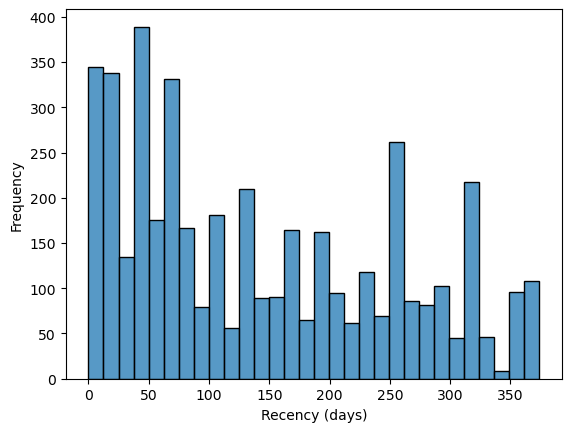

In [10]:
# Plot a histogram of Recency
sns.histplot(customer['RECENCY'], bins=30)
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Print the Summary Statistics for Recency
print("Descriptive Statistics for Recency:")
print(customer['RECENCY'].describe())

Descriptive Statistics for Recency:
count    4372.000000
mean      143.770128
std       109.490133
min         0.000000
25%        44.000000
50%       121.000000
75%       240.000000
max       374.000000
Name: RECENCY, dtype: float64


## Frequency
<p>The frequency with which a customer purchases one or more products.</p>

In [13]:
# Getting the total number of purchases per cliente
frequency = df.groupby('CUSTOMER_ID')['INVOICE_NO'].nunique().reset_index()
frequency.columns = ['CUSTOMER_ID', 'FREQUENCY']
frequency

,CUSTOMER_ID,FREQUENCY
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [14]:
# Merge the DataFrame we just created with the unique customers DataFrame
customer = pd.merge(customer, frequency, on='CUSTOMER_ID')
customer

,CUSTOMER_ID,INVOICE_DATE,RECENCY,FREQUENCY
0,17850.0,2020-02-10 14:38:00,302,35
1,13047.0,2020-03-30 16:36:00,253,18
2,12583.0,2020-09-30 12:58:00,69,18
3,13748.0,2020-04-21 14:30:00,231,5
4,15100.0,2019-12-16 14:32:00,358,6
...,...,...,...,...
4367,13436.0,2020-12-08 10:33:00,1,1
4368,15520.0,2020-12-08 10:58:00,1,1
4369,13298.0,2020-12-08 13:11:00,0,1
4370,14569.0,2020-12-08 14:58:00,0,1


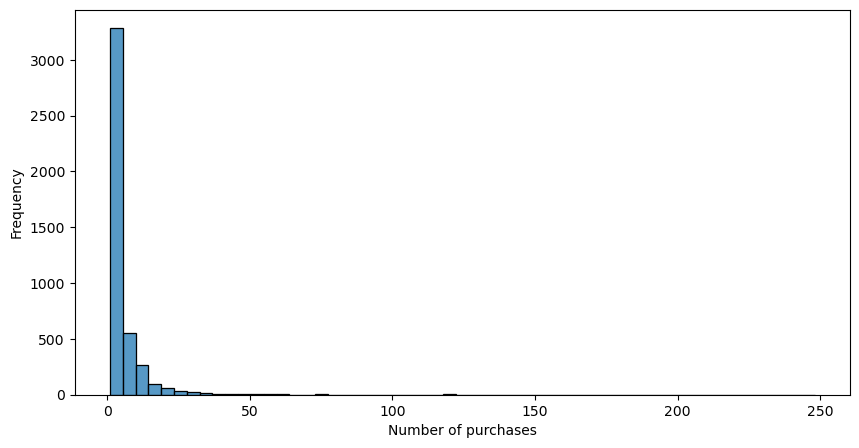

In [15]:
# Plot a histogram of Frequency
plt.figure(figsize=(10, 5))
sns.histplot(customer['FREQUENCY'], bins=55)
plt.xlabel('Number of purchases')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Print the Summary Statistics for Frequency
print("Descriptive Statistics for Frequency:")
print(customer['FREQUENCY'].describe())

Descriptive Statistics for Frequency:
count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: FREQUENCY, dtype: float64


## Monetary
<p>The total amount a customer has spent purchasing my products.</p>

In [18]:
# Calculate the total amount for each purchase
df['MONETARY'] = df['QUANTITY'] * df['UNIT_PRICE']

# Get the monetary value of purchases per customer
monetary = df.groupby('CUSTOMER_ID')['MONETARY'].sum().reset_index(name='MONETARY')
monetary

,CUSTOMER_ID,MONETARY
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [19]:
# Merge the DataFrame we just created with the unique customers DataFrame
customer = pd.merge(customer, monetary, on='CUSTOMER_ID')
customer

,CUSTOMER_ID,INVOICE_DATE,RECENCY,FREQUENCY,MONETARY
0,17850.0,2020-02-10 14:38:00,302,35,5288.63
1,13047.0,2020-03-30 16:36:00,253,18,3079.10
2,12583.0,2020-09-30 12:58:00,69,18,7187.34
3,13748.0,2020-04-21 14:30:00,231,5,948.25
4,15100.0,2019-12-16 14:32:00,358,6,635.10
...,...,...,...,...,...
4367,13436.0,2020-12-08 10:33:00,1,1,196.89
4368,15520.0,2020-12-08 10:58:00,1,1,343.50
4369,13298.0,2020-12-08 13:11:00,0,1,360.00
4370,14569.0,2020-12-08 14:58:00,0,1,227.39


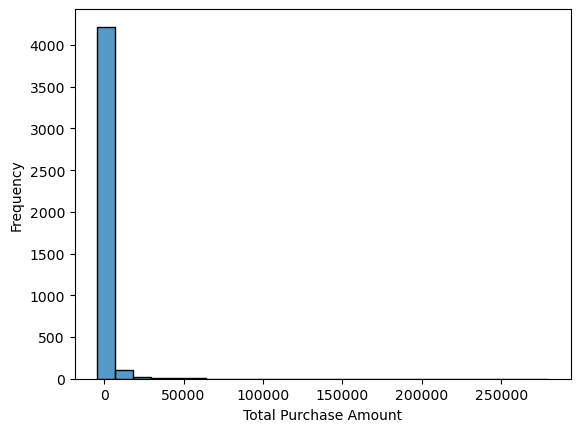

In [20]:
# Plot a histogram of Monetary
sns.histplot(customer['MONETARY'], bins=25)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Print the Summary Statistics for Monetary
print("Descriptive Statistics for Monetary::")
print(customer['MONETARY'].describe())

Descriptive Statistics for Monetary::
count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: MONETARY, dtype: float64


## k-Means Algorithm
<p>We have already created our main indicators for the RFM methodology. Now it's time to do <i>Machine Learning</i>. For this, we will use an unsupervised algorithm called <b>k-Means</b>.</p>

In [23]:
# Cluster ordering function
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Elbow Method
<p>What is my optimal number of clusters? Let's build an <i>elbow chart</i> to figure it out.</p>

In [25]:
# Import kMeans library
from sklearn.cluster import KMeans

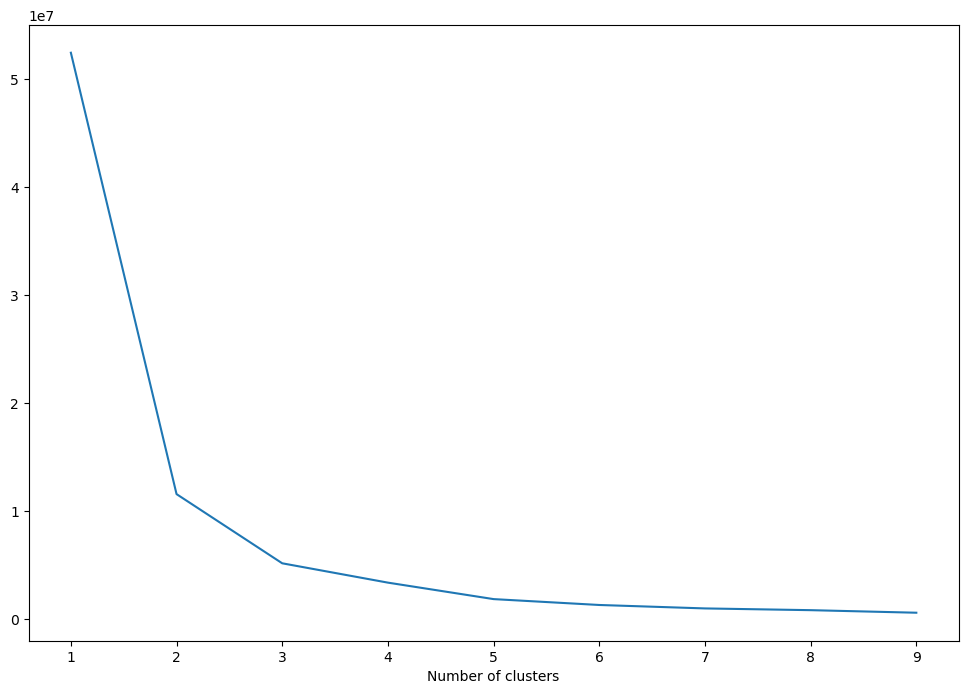

In [26]:
# Initial Setup - Let's use the Recency indicator as a reference
sse = {}
recency = customer[['RECENCY']]

for k in range(1, 10):
    # Instantiate the k-means algorithm iterating over k
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Train the algorithm
    kmeans.fit(recency)
    
    # Assign the labels
    recency["clusters"] = kmeans.labels_
    
    # Append the inertia or variation to the sse array
    sse[k] = kmeans.inertia_
    
# Elbow chart
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [27]:
# Instantiate the algorithm with 4 clusters for Recency
kmeans = KMeans(n_clusters=4, random_state=1)

# Train the algorithm
kmeans.fit(recency)

# Get the predictions
customer['RECENCY_CLUSTER'] = kmeans.labels_

# Sort the clusters
customer = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer, False)

# Descriptive statistics of the created cluster
customer.groupby('RECENCY_CLUSTER')['RECENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
RECENCY_CLUSTER,,,,,,,,
0,682.0,324.246334,28.744268,279.0,301.0,318.0,357.0,374.0
1,886.0,232.778781,26.785540,185.0,204.0,235.5,255.0,277.0
2,917.0,136.040349,26.262853,89.0,109.0,134.0,162.0,184.0
3,1887.0,40.506624,24.808275,0.0,17.0,40.0,64.0,88.0


In [28]:
# Instantiate the algorithm with 4 clusters for Frequency
kmeans = KMeans(n_clusters=4, random_state=1)

# Train the algorithm
kmeans.fit(frequency)

# Get the predictions
customer['FREQUENCY_CLUSTER'] = kmeans.labels_

# Sort the clusters
customer = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer, True)

# Descriptive statistics of the clusters
print("Descriptive statistics for Frequency Cluster:")
print(customer.groupby('FREQUENCY_CLUSTER')['FREQUENCY'].describe())

Descriptive statistics for Frequency Cluster:
                    count       mean        std  min  25%  50%   75%    max
FREQUENCY_CLUSTER                                                          
0                  1048.0   1.927481   1.837862  1.0  1.0  1.0   2.0   34.0
1                  1100.0   3.120000   2.701423  1.0  1.0  2.0   4.0   26.0
2                  1112.0   4.773381   4.828181  1.0  2.0  3.0   6.0   46.0
3                  1112.0  10.278777  16.403705  1.0  3.0  6.0  12.0  248.0


In [29]:
# Instantiate the algorithm with 4 clusters for Monetary
kmeans = KMeans(n_clusters=4, random_state=1)

# Train the algorithm
kmeans.fit(monetary)

# Get the predictions
customer['MONETARY_CLUSTER'] = kmeans.labels_

# Sort the clusters.
customer = order_cluster('MONETARY_CLUSTER', 'MONETARY', customer, False)

# Descriptive statistics of the clusters
print("Descriptive statistics for Monetary Cluster:")
print(customer.groupby('MONETARY_CLUSTER')['MONETARY'].describe())

Descriptive statistics for Monetary Cluster:
                   count         mean          std      min       25%  \
MONETARY_CLUSTER                                                        
0                   28.0  2507.326786  5680.935847    73.78  294.4375   
1                 4338.0  1895.913977  8239.052305 -4287.63  293.6175   
2                    2.0  1020.275000  1066.804930   265.93  643.1025   
3                    4.0   836.320000   655.144910   193.14  498.6750   

                       50%        75%        max  
MONETARY_CLUSTER                                  
0                  607.020  2037.3350   28658.88  
1                  648.075  1607.5625  279489.02  
2                 1020.275  1397.4475    1774.62  
3                  705.770  1043.4150    1740.60  


## Segmentation Score
<p>The k-means algorithm provides a generalized segmentation, but we can customize it further by creating a metric that assigns a score to the value of each cluster.</p>

In [31]:
# Let's create our score by summing the value of each cluster
customer['SCORE'] = customer['RECENCY_CLUSTER'] + customer['FREQUENCY_CLUSTER'] + customer['MONETARY_CLUSTER']

# Get the average for each of the metrics of the created scores
customer['SCORE'].mean()

4.436184812442818

In [32]:
# Create a function that assigns the following:
# If score <= 1 then 'Low-Value', if score >1 and <=4 then 'Average', if score >4 and <=6 then 'Potential', and finally if score >6 then 'High-Value'
def segment(score):
    if score <= 1:
        return 'Low-Value'
    elif 1 < score <= 4:
        return 'Average'
    elif 4 < score <= 6:
        return 'Potential'
    else:
        return 'High-Value'
        
# Create a column applying this function to the 'SCORE' field
customer['SEGMENT'] = customer['SCORE'].apply(segment)

In [33]:
customer.head()

,CUSTOMER_ID,INVOICE_DATE,RECENCY,FREQUENCY,MONETARY,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
0,17850.0,2020-02-10 14:38:00,302,35,5288.63,0,3,1,4,Average
1,13047.0,2020-03-30 16:36:00,253,18,3079.10,1,3,1,5,Potential
2,12583.0,2020-09-30 12:58:00,69,18,7187.34,3,3,1,7,High-Value
3,13748.0,2020-04-21 14:30:00,231,5,948.25,1,3,1,5,Potential
4,15100.0,2019-12-16 14:32:00,358,6,635.10,0,3,1,4,Average


In [34]:
# Print the proportion or total number of customers by segment
print("Proportion of customers by segment:")
print(customer['SEGMENT'].value_counts(normalize=True))

Proportion of customers by segment:
SEGMENT
Average       0.658051
Potential     0.265782
High-Value    0.076167
Name: proportion, dtype: float64


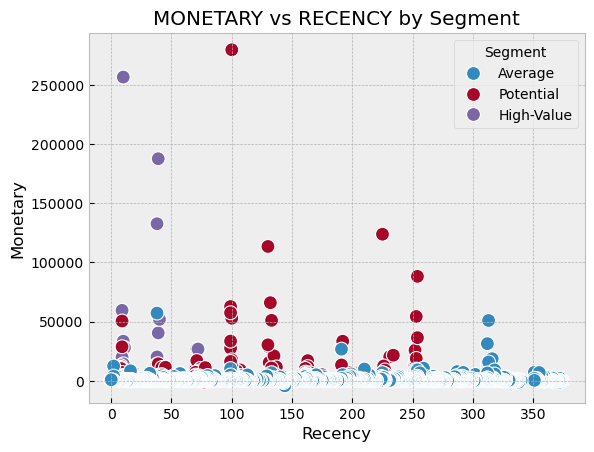

In [35]:
# Set the 'bmh' style
plt.style.use('bmh')

# Filter the values for RECENCY < 4000
filtered_customer = customer[customer['RECENCY'] < 4000]

# Create a scatter plot of 'MONETARY' VS 'RECENCY' by Segment
sns.scatterplot(data=filtered_customer, x='RECENCY', y='MONETARY', hue='SEGMENT', s=100)
plt.title('MONETARY vs RECENCY by Segment')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Segment')
plt.show()

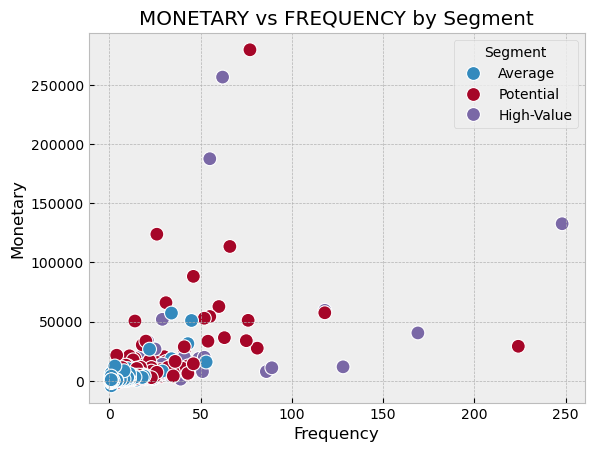

In [36]:
# Create a scatter plot of 'MONETARY' vs 'FREQUENCY' by Segment
sns.scatterplot(data=filtered_customer, x='FREQUENCY', y='MONETARY', hue='SEGMENT', s=100)
plt.title('MONETARY vs FREQUENCY by Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Segment')
plt.show()

### Observations:
1. Most customers are in the Average segment (65.8% of the total), which implies moderate purchase frequency and low spending.
2. There is a considerable number of customers in the Potential segment (26.6% of the total), whose behavior tends to be between that of Average customers and those classified as High-Value.
3. It is the smallest segment (7.6% of the total), consisting of customers who spend the most money and purchase the most frequently.
4. Customers in cluster 3 (with the highest purchase frequency) exhibit very active purchasing behavior, with an average of 10.28 purchases per customer, although with high dispersion (std of 16.4), which could indicate that some of these customers make extremely frequent purchases.
5. Customers in clusters with lower frequencies (0, 1, 2) have purchase frequencies ranging from 1 to 4, reflecting that most customers buy occasionally.
6. Customers in the High-Value segment not only have higher spending, but also higher purchase frequency and recency, indicating that these customers are the most valuable to the company.
7. The Average segment has a more moderate purchasing behavior, with average spending and lower frequency compared to High-Value customers.
8. The Potential segment has behavior similar to Average, but with slightly lower frequency, suggesting that these customers could improve their behavior if given an appropriate incentive.

### Credits and Acknowledgements

**Original code by:** Iván Alducin  
**Modifications and Interpretations by:** Esteban Márquez  

This notebook is based on the original work by Iván Alducin, which provided the foundation for the analysis. The modifications and additional insights presented here were made by Esteban Márquez to expand upon and enhance the original approach.

Special thanks to Iván Alducin for his work, which made this analysis possible. The improvements and interpretations showcased in this notebook are my own, aimed at providing a deeper understanding of the subject matter.

Esteban Márquez  
Date: November 20, 2024
